In [1]:
import requests
import json
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")


In [2]:
api_key = "test_c9a7214477d9edb4a33b4e0c52728d3ba371b6f291c2d8c9f946e41e228c006a7c699f5e6e5f75537ed8bd49f6f75ecd"
# 사용자 ID 가져오기
def get_user_id(nickname):
    user_url = "https://open.api.nexon.com/fconline/v1/id?nickname=" + nickname
    result = requests.get(user_url,
                     headers = {"x-nxopen-api-key" : api_key})
    user_info = result.json()
    return user_info['ouid']

In [3]:
get_user_id('허고구마')

'cc15840512e2da8f32a3387dd8c0299a'

In [4]:
# 사용자의 거래 정보 가져오기
def get_market_info(user_id, number):
    trade_url = f"https://open.api.nexon.com/fconline/v1/user/trade?tradetype=buy&offset=0&limit={number}"
    result = requests.get(trade_url, headers={"x-nxopen-api-key": api_key})
    trade_info = result.json()
    trade = []
    # 받은 정보 중 구매 날짜, 구매 선수 Id, 강화단계, 구매 가격을 dictionary list 형태로 받기
    for info in trade_info:
        trade.append({
            "구매 날짜": info['tradeDate'].replace("T", " "),
            "구매 선수": info['spid'],
            "강화 단계": info['grade'],
            "가격": format(info['value'], ',d')
        })
    return trade


In [5]:
# 사용자 ID 가져오기
user_id = get_user_id('허고구마')

# 사용자의 거래 정보 가져오기
market_info = get_market_info(user_id, 2)
market_info

[{'구매 날짜': '2023-10-26 14:11:47',
  '구매 선수': 253203574,
  '강화 단계': 5,
  '가격': '836,000,000'},
 {'구매 날짜': '2023-10-26 14:11:47',
  '구매 선수': 253186345,
  '강화 단계': 5,
  '가격': '280,000,000'}]

In [6]:
# 사용자의 매치정보
def get_match_info(ouid, matchtype, number):
    match_url = f"https://open.api.nexon.com/fconline/v1/user/match?ouid={ouid}&matchtype={matchtype}&offset=0&limit={number}"
    result = requests.get(match_url, headers={"x-nxopen-api-key": api_key})
    match_info = result.json()

    # match_info가 문자열인 경우 딕셔너리로 변환
    if isinstance(match_info, str):
        match_info = json.loads(match_info)

    matches = []
    for match_id in match_info:
        matches.append(match_id)
    return matches


In [7]:
ouid = get_user_id('교촌콤보반반') # ouid :닉네임별 고유식별번호
# 주로많이하는 매치종류 => matchtype :40 (클래식 1:1), matchtype :50 (공식경기), 

matche_ids = get_match_info(ouid, 50, 100)
for match_id in matche_ids:
    print(match_id)

65846397843991ed5a64c945
65846033666df12ae3510154
6584560338f538404be9f7cd
658451f86a8e7e277f8ddbd1
65809a01824dc667f7103159
658096cd87779d0120a25827
658093cf5a6bd95d67a3e58e
6580901d6ea7b85666683c9d
657d3b9576e38a05438565d3
657d38b95bf2c76b8d6ebc59
657d34855ce343312e179cb8
657d1b5f7c31650c7482a922
657d184a51fcdb21db5519c2
657c729497d4e18d4067aa74
657c6fd060d7707b5f848279
657c6d158fe2b81564718db4
657b41f5393b71ff51467b7a
657b3ec8102055f981554ce3
657b3b56d693c50e4a506d0b
657b24acfcc31084c1dbeaa9
657b1ff4ce8fc77bf6029d5c
657b175e6914930cee44b341
657369ada9f8b0eb6d423ce0
657366766cd5684a03004504
6573627779d08804b1ee67d3
657207a4d8851b7d54ff8565
657203a4fb1fb806e0692c42
6571ff86d298635fc0eb7db4
6570af2db351df4dfa444adc
6570ad38b3a24c8296a62736
6570ac0c2cd6d7828d78d889
6570a91671130af4ce5a5f0a
656dede120a11d29a2fabe65
656dec1888b9121214221e48
656de8afd9a44d8d5599ecd3
656d74fbaa6cb652f8d2967e
656d71ae9b0d540e4cc98906
656d6e4104a387ee9ac2a05c
656b7919097b82d0f19d0ce7
656b7565a154be6313cb0192


In [8]:
# 사용자의 매치정보 디테일
def get_match_detail_info(match_id):
    match_detail_url = f"https://open.api.nexon.com/fconline/v1/match-detail?matchid={match_id}"
    result = requests.get(match_detail_url, headers={"x-nxopen-api-key": api_key})
    match_detail_info = result.json()

    return match_detail_info

In [9]:
match_detail = get_match_detail_info(match_id)
match_detail

{'matchId': '655f785effc31e36ce394f5b',
 'matchDate': '2023-11-23T16:16:36',
 'matchType': 50,
 'matchInfo': [{'ouid': '52ffbe24fce3a7da7f0a1438fb18588e',
   'nickname': '교촌콤보반반',
   'matchDetail': {'seasonId': 202312,
    'matchResult': '승',
    'matchEndType': 0,
    'systemPause': 0,
    'foul': 1,
    'injury': 0,
    'redCards': 0,
    'yellowCards': 0,
    'dribble': 78,
    'cornerKick': 0,
    'possession': 51,
    'offsideCount': 0,
    'averageRating': 4.53889,
    'controller': 'keyboard'},
   'shoot': {'shootTotal': 5,
    'effectiveShootTotal': 4,
    'shootOutScore': 0,
    'goalTotal': 3,
    'goalTotalDisplay': 3,
    'ownGoal': 0,
    'shootHeading': 0,
    'goalHeading': 0,
    'shootFreekick': 0,
    'goalFreekick': 0,
    'shootInPenalty': 4,
    'goalInPenalty': 3,
    'shootOutPenalty': 1,
    'goalOutPenalty': 0,
    'shootPenaltyKick': 0,
    'goalPenaltyKick': 0},
   'shootDetail': [{'goalTime': 442,
     'x': 0.8899345993995667,
     'y': 0.5617446303367615,
 

In [10]:
# 사용자의 매치정보
def get_match_info(ouid, matchtype, number):
    match_url = f"https://open.api.nexon.com/fconline/v1/user/match?ouid={ouid}&matchtype={matchtype}&offset=0&limit={number}"
    match_result = requests.get(match_url, headers={"x-nxopen-api-key": api_key})
    match_info = match_result.json()
    match_user = pd.DataFrame()

    for i , m in tqdm(enumerate(match_info)):
        match_ids = match_info[i]
        # 매치 상세정보 조회
        match_detail_url = f"https://open.api.nexon.com/fconline/v1/match-detail?matchid={match_ids}"
        match_detail_result = requests.get(match_detail_url, headers={"x-nxopen-api-key": api_key})
        match_detail_info = match_detail_result.json()
        match_detail = pd.DataFrame(match_detail_info)

        match_user = pd.concat([match_user, match_detail], axis=0)

    matchids = match_info[0]
    match_detail_url = f"https://open.api.nexon.com/fconline/v1/match-detail?matchid={match_ids}"
    match_detail_result = requests.get(match_detail_url, headers={"x-nxopen-api-key": api_key})
    match_detail_info = match_detail_result.json()

    # 매치정보, 상세정보, 슛, 패스, 수비 등 추출
    match_Info  = pd.DataFrame()
    match_Detail  = pd.DataFrame()
    match_Shoot  = pd.DataFrame()
    match_Pass  = pd.DataFrame()
    match_Defence  = pd.DataFrame()
    
    # 정보 리스트 형태로 만들기
    li_ouid = [i.get('ouid') for i in match_user['matchInfo']]
    li_nickname = [i.get('nickname') for i in match_user['matchInfo']]
    li_matchDetail = [i.get('matchDetail') for i in match_user['matchInfo']]
    li_shootDetail = [i.get('shoot') for i in match_user['matchInfo']]
    li_passDetail = [i.get('pass') for i in match_user['matchInfo']]
    li_defenceDetail = [i.get('defence') for i in match_user['matchInfo']]

    match_Info = match_user.iloc[:, :2].reset_index(drop=True)
    ouid_data = pd.DataFrame(li_ouid)
    nickname_data = pd.DataFrame(li_nickname)
    match_Detail = pd.DataFrame(li_matchDetail)
    match_Shoot = pd.DataFrame(li_shootDetail)
    match_Pass = pd.DataFrame(li_passDetail)
    match_Defence = pd.DataFrame(li_defenceDetail)

    ouid_data = ouid_data.rename(columns={0 : 'ouid'})
    nickname_data = nickname_data.rename(columns={0 : 'nickname'})

    user = pd.concat([match_Info, ouid_data, nickname_data, match_Detail, match_Shoot,
                     match_Pass, match_Defence], axis = 1)
    return user

In [ ]:
PANGCOU , 두류역, 몌에에에에

In [12]:
ouid = get_user_id('교촌콤보반반')
교촌콤보반반 = get_match_info(ouid, 50, 100)
교촌콤보반반

0it [00:00, ?it/s]

,matchId,matchDate,ouid,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,...,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,65846397843991ed5a64c945,2023-12-21T16:21:41,29873d80440e329c50437973ee1e3f97,농담곰임,202401,승,0,0.0,3.0,0.0,...,5.0,5.0,20.0,17.0,3.0,3.0,10.0,3.0,7.0,4.0
1,65846397843991ed5a64c945,2023-12-21T16:21:41,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,0.0,0.0,...,6.0,5.0,29.0,26.0,1.0,1.0,6.0,0.0,4.0,3.0
2,65846033666df12ae3510154,2023-12-21T16:08:01,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,1.0,0.0,...,8.0,5.0,17.0,13.0,2.0,2.0,9.0,0.0,13.0,10.0
3,65846033666df12ae3510154,2023-12-21T16:08:01,7e015f89bd7bc879c39a658350ddd3c4,청천동굴리트,202401,승,0,0.0,2.0,1.0,...,0.0,0.0,35.0,29.0,1.0,1.0,5.0,0.0,8.0,5.0
4,6584560338f538404be9f7cd,2023-12-21T15:25:07,e47b2deb73852c222ac001da857a7136,김리암,202401,무,0,0.0,0.0,0.0,...,1.0,0.0,21.0,19.0,4.0,1.0,4.0,0.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,655f827e0634634510995dbf,2023-11-23T17:00:29,bf4f36367388e8ff2590dc4b2fbdd501,하쿠야,202312,승,0,2.0,0.0,0.0,...,4.0,3.0,20.0,15.0,0.0,0.0,9.0,1.0,11.0,5.0
120,655f7b4f3660d07f58a3d43a,2023-11-23T16:28:15,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,0,0.0,1.0,0.0,...,2.0,2.0,18.0,15.0,3.0,1.0,9.0,0.0,12.0,6.0
121,655f7b4f3660d07f58a3d43a,2023-11-23T16:28:15,338e7602ab9dd00acb830b2e4a6c7707,리그우승황유,202312,패,0,0.0,0.0,0.0,...,5.0,4.0,13.0,11.0,2.0,1.0,11.0,0.0,8.0,6.0
122,655f785effc31e36ce394f5b,2023-11-23T16:16:36,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,0,0.0,1.0,0.0,...,2.0,2.0,32.0,26.0,3.0,2.0,6.0,0.0,7.0,4.0


In [14]:
교촌콤보반반.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   124 non-null    object 
 1   matchDate                 124 non-null    object 
 2   ouid                      124 non-null    object 
 3   nickname                  124 non-null    object 
 4   seasonId                  124 non-null    int64  
 5   matchResult               124 non-null    object 
 6   matchEndType              124 non-null    int64  
 7   systemPause               120 non-null    float64
 8   foul                      120 non-null    float64
 9   injury                    120 non-null    float64
 10  redCards                  120 non-null    float64
 11  yellowCards               120 non-null    float64
 12  dribble                   120 non-null    float64
 13  cornerKick                120 non-null    float64
 14  possession

In [15]:
교촌콤보반반_win = 교촌콤보반반.loc[(교촌콤보반반['matchResult'] == '승') & (교촌콤보반반['nickname'] == '교촌콤보반반')].reset_index(drop=True)
교촌콤보반반_lose = 교촌콤보반반.loc[(교촌콤보반반['matchResult'] == '패') & (교촌콤보반반['nickname'] == '교촌콤보반반')].reset_index(drop=True)
교촌콤보반반_draw = 교촌콤보반반.loc[(교촌콤보반반['matchResult'] == '무') & (교촌콤보반반['nickname'] == '교촌콤보반반')].reset_index(drop=True)

print('승리했을 때 데이터 형태 : ', 교촌콤보반반_win.shape)
print('패배했을 때 데이터 형태 : ', 교촌콤보반반_lose.shape)
print('비겼을 때 데이터 형태 : ', 교촌콤보반반_draw.shape)

승리했을 때 데이터 형태 :  (24, 52)
패배했을 때 데이터 형태 :  (28, 52)
비겼을 때 데이터 형태 :  (10, 52)


In [17]:
교촌콤보반반_data = 교촌콤보반반.loc[교촌콤보반반['nickname'] == '교촌콤보반반']
print('교촌콤보반반 지표 : ', 교촌콤보반반_data.shape)

교촌콤보반반 지표 :  (62, 52)


## 경기결과 원그래프

In [18]:
import seaborn as sns
from IPython.display import Image # 주피터 노트북에 이미지 삽입
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용자의 컴퓨터에 있는 한글 폰트 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



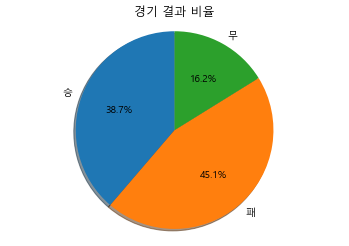

In [19]:
labels = ['승', '패', '무']
sizes = [2*round(len(교촌콤보반반_win)/len(교촌콤보반반), 3), 2*round(len(교촌콤보반반_lose)/len(교촌콤보반반), 3),
        2*round(len(교촌콤보반반_draw)/len(교촌콤보반반), 3)]
explode = (0, 0, 0)

title = '경기 결과 비율'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title)
plt.show()

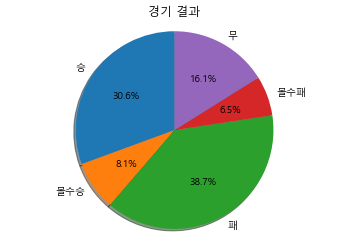

In [20]:
labels = ['승', '몰수승', '패', '몰수패', '무']
sizes = [round(len(교촌콤보반반_win.loc[교촌콤보반반_win['matchEndType'] == 0])/len(교촌콤보반반_data), 3),
         round(len(교촌콤보반반_win.loc[교촌콤보반반_win['matchEndType'] == 1])/len(교촌콤보반반_data), 3),
         round(len(교촌콤보반반_lose.loc[교촌콤보반반_lose['matchEndType'] == 0])/len(교촌콤보반반_data), 3),
         round(len(교촌콤보반반_lose.loc[교촌콤보반반_lose['matchEndType'] == 2])/len(교촌콤보반반_data), 3),
         round(len(교촌콤보반반_draw.loc[교촌콤보반반_draw['matchEndType'] == 0])/len(교촌콤보반반_data), 3)]

explode = (0, 0, 0, 0, 0)

title = '경기 결과'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title)
plt.show()

## 데이터 전처리

In [21]:
print("변수 추가 전 형태:", 교촌콤보반반_data.shape)
교촌콤보반반_data['date'] = [교촌콤보반반_data['matchDate'].str.split('T')[i][0] for i in 교촌콤보반반_data['matchDate'].index]
교촌콤보반반_data['time'] = [교촌콤보반반_data['matchDate'].str.split('T')[i][1] for i in 교촌콤보반반_data['matchDate'].index]
print("변수 추가 후 형태:", 교촌콤보반반_data.shape)

변수 추가 전 형태: (62, 52)
변수 추가 후 형태: (62, 54)


In [22]:
교촌콤보반반_data['date'] = pd.to_datetime(교촌콤보반반_data['date'])
# date에서 year, month, day 추출하여 새로운 열 생성
교촌콤보반반_data['year'] = 교촌콤보반반_data['date'].dt.year
교촌콤보반반_data['month'] = 교촌콤보반반_data['date'].dt.month
교촌콤보반반_data['day'] = 교촌콤보반반_data['date'].dt.day
print('변수 추가 이후 데이터 형태 : ', 교촌콤보반반_data.shape)


변수 추가 이후 데이터 형태 :  (62, 57)


In [23]:
교촌콤보반반_data['hour'] = 교촌콤보반반_data['time'].str[0:2]
교촌콤보반반_data['minute'] = 교촌콤보반반_data['time'].str[3:5]
교촌콤보반반_data['second'] = 교촌콤보반반_data['time'].str[6:]
print('변수 추가 이후 데이터 형태 : ', 교촌콤보반반_data.shape)

변수 추가 이후 데이터 형태 :  (62, 60)


In [24]:
교촌콤보반반_data.head()

,matchId,matchDate,ouid,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,...,tackleTry,tackleSuccess,date,time,year,month,day,hour,minute,second
1,65846397843991ed5a64c945,2023-12-21T16:21:41,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,0.0,0.0,...,4.0,3.0,2023-12-21,16:21:41,2023,12,21,16,21,41
2,65846033666df12ae3510154,2023-12-21T16:08:01,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,1.0,0.0,...,13.0,10.0,2023-12-21,16:08:01,2023,12,21,16,08,01
5,6584560338f538404be9f7cd,2023-12-21T15:25:07,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,무,0,1.0,0.0,0.0,...,11.0,3.0,2023-12-21,15:25:07,2023,12,21,15,25,07
6,658451f86a8e7e277f8ddbd1,2023-12-21T15:08:13,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,0.0,2.0,0.0,...,4.0,1.0,2023-12-21,15:08:13,2023,12,21,15,08,13
8,65809a01824dc667f7103159,2023-12-18T19:25:08,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,1,0.0,0.0,0.0,...,4.0,2.0,2023-12-18,19:25:08,2023,12,18,19,25,08


In [43]:
교촌콤보반반_data['seasonId'].value_counts() # 202312 = 11~12월, 202401 = 12월 

seasonId
202312    58
202401     4
Name: count, dtype: int64

In [44]:
교촌콤보반반_data = 교촌콤보반반_data.sort_index(ascending=False).reset_index(drop = True) # 과거부터 현재로 인덱스 재설정
교촌콤보반반_data

,matchId,matchDate,ouid,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,...,tackleTry,tackleSuccess,date,time,year,month,day,hour,minute,second
0,65846397843991ed5a64c945,2023-12-21T16:21:41,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,0.0,0.0,...,4.0,3.0,2023-12-21,16:21:41,2023,12,21,16,21,41
1,65846033666df12ae3510154,2023-12-21T16:08:01,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,1.0,0.0,...,13.0,10.0,2023-12-21,16:08:01,2023,12,21,16,08,01
2,6584560338f538404be9f7cd,2023-12-21T15:25:07,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,무,0,1.0,0.0,0.0,...,11.0,3.0,2023-12-21,15:25:07,2023,12,21,15,25,07
3,658451f86a8e7e277f8ddbd1,2023-12-21T15:08:13,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,0.0,2.0,0.0,...,4.0,1.0,2023-12-21,15:08:13,2023,12,21,15,08,13
4,65809a01824dc667f7103159,2023-12-18T19:25:08,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,1,0.0,0.0,0.0,...,4.0,2.0,2023-12-18,19:25:08,2023,12,18,19,25,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,65605d8b7db3f4f1e1396157,2023-11-24T08:34:26,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,0,0.0,2.0,0.0,...,10.0,6.0,2023-11-24,08:34:26,2023,11,24,08,34,26
58,655f85d1568780d3a4e2fccf,2023-11-23T17:13:28,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,패,0,0.0,0.0,0.0,...,8.0,5.0,2023-11-23,17:13:28,2023,11,23,17,13,28
59,655f827e0634634510995dbf,2023-11-23T17:00:29,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,패,0,1.0,2.0,0.0,...,7.0,5.0,2023-11-23,17:00:29,2023,11,23,17,00,29
60,655f7b4f3660d07f58a3d43a,2023-11-23T16:28:15,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,0,0.0,1.0,0.0,...,12.0,6.0,2023-11-23,16:28:15,2023,11,23,16,28,15


In [45]:
교촌콤보반반_data['matchResult'].value_counts()

matchResult
패    28
승    24
무    10
Name: count, dtype: int64

In [46]:
season_result_list = list(zip(교촌콤보반반_data['seasonId'], 교촌콤보반반_data['matchResult']))
season_result_list[:5] # 처음 5개 조회

[(202401, '패'), (202401, '패'), (202401, '무'), (202401, '패'), (202312, '승')]

### - 시즌별 승, 패 구분
### - 승 : 1점, 무&패 : 0점

In [48]:
list_11 = list() # 202312, 58개
list_12 = list() # 202401, 4개

for idx, result in enumerate(season_result_list):
    if (result[0] == 202312) & (result[1] == '승'):
        list_11.append(1)
    elif ((result[0] == 202312) & (result[1] == '무')) or ((result[0] == 202312) & (result[1] == '패')):
        list_11.append(0)
    elif (result[0] == 202401) & (result[1] == '승'):
        list_12.append(1)
    elif ((result[0] == 202401) & (result[1] == '무')) or ((result[0] == 202401) & (result[1] == '패')):
        list_12.append(0)
        
print('Season 202311 : ', len(list_11))
print('Season 202312 : ',len(list_12))


Season 202311 :  58
Season 202312 :  4


In [49]:
# 202312 시즌
score_11 = 0
rate_11 = []

for idx, value in enumerate(list_11):
    score_11 += value
    rate_11.append(score_11 / (idx + 1) * 100)

# 202401 시즌
score_12 = 0
rate_12 = []

for idx, value in enumerate(list_12):
    score_12 += value
    rate_12.append(score_12 / (idx + 1) * 100)

In [50]:
print('Season 11 Winning Rate length : ', len(rate_11))
print('Season 12 Winning Rate length : ', len(rate_12))

Season 11 Winning Rate length :  58
Season 12 Winning Rate length :  4


In [51]:
교촌콤보반반_data['Rate'] = rate_11 + rate_12
교촌콤보반반_data.head()

,matchId,matchDate,ouid,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,...,tackleSuccess,date,time,year,month,day,hour,minute,second,Rate
0,65846397843991ed5a64c945,2023-12-21T16:21:41,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,0.0,0.0,...,3.0,2023-12-21,16:21:41,2023,12,21,16,21,41,100.000000
1,65846033666df12ae3510154,2023-12-21T16:08:01,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,1.0,1.0,0.0,...,10.0,2023-12-21,16:08:01,2023,12,21,16,08,01,100.000000
2,6584560338f538404be9f7cd,2023-12-21T15:25:07,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,무,0,1.0,0.0,0.0,...,3.0,2023-12-21,15:25:07,2023,12,21,15,25,07,66.666667
3,658451f86a8e7e277f8ddbd1,2023-12-21T15:08:13,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202401,패,0,0.0,2.0,0.0,...,1.0,2023-12-21,15:08:13,2023,12,21,15,08,13,75.000000
4,65809a01824dc667f7103159,2023-12-18T19:25:08,52ffbe24fce3a7da7f0a1438fb18588e,교촌콤보반반,202312,승,1,0.0,0.0,0.0,...,2.0,2023-12-18,19:25:08,2023,12,18,19,25,08,60.000000


## 시간별 승률 그래프

In [52]:
group_data = pd.DataFrame(교촌콤보반반_data.groupby(['hour'], as_index=False)['Rate'].mean()).reset_index(drop = True)
group_data # 시간별 평균 승률 그래프

,hour,Rate
0,03,40.064103
1,05,47.727273
2,06,45.642682
3,08,39.961799
4,09,39.642857
5,15,45.705309
6,16,47.000000
7,17,33.073123
8,18,40.084230
9,19,43.102846


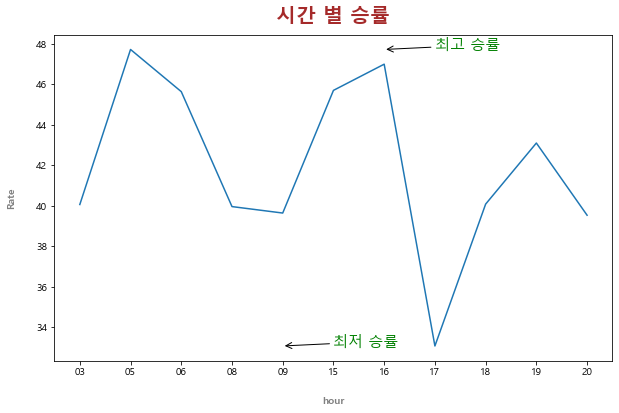

In [53]:
font_label = {
    'color' : 'gray',
    'weight' : 'bold',
    'size' : 10
}

font_title = {
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'va' : 'baseline',
    'ha' : 'center'
}

font_text = {
    'size' : 10,
    'color' : 'blue',
    'weight' : 'bold',
    'horizontalalignment' : 'left',
    'verticalalignment' : 'center'
}

title = '시간 별 승률'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(group_data['hour'], group_data['Rate'])

ax.set_xlabel('hour', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Rate', fontdict = font_label, labelpad = 20)
ax.set_title(title, fontdict = font_title, pad = 12)


# Add average
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate("최고 승률", (6, group_data['Rate'].max()), xytext=(7, group_data['Rate'].max()), 
           color='green', fontsize=15,
           arrowprops=arrowprops)

ax.annotate("최저 승률", (4, group_data['Rate'].min()), xytext=(5, group_data['Rate'].min()), 
           color='green', fontsize=15,
           arrowprops=arrowprops)

plt.show()

In [54]:
def convert_count_data(data, column):
    result = pd.DataFrame(data[column].value_counts()).sort_index(ascending=True)
    return result

In [55]:
win = convert_count_data(교촌콤보반반_win, 'cornerKick')
lose = convert_count_data(교촌콤보반반_lose, 'cornerKick')
draw = convert_count_data(교촌콤보반반_draw, 'cornerKick')

# 'win' 데이터프레임에 대한 조작
win.reset_index(drop=True, inplace=True)
win.rename(columns={'count': 'cornerKick'}, inplace=True)

# 'lose' 데이터프레임에 대한 조작
lose.reset_index(drop=True, inplace=True)
lose.rename(columns={'count': 'cornerKick'}, inplace=True)

# 'draw' 데이터프레임에 대한 조작
draw.reset_index(drop=True, inplace=True)
draw.rename(columns={'count': 'cornerKick'}, inplace=True)

In [56]:
win

,cornerKick
0,5
1,8
2,2
3,7
4,1
5,1


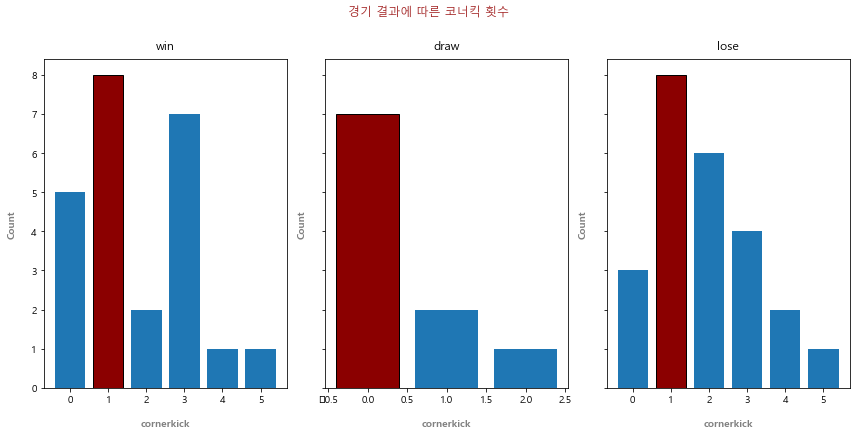

In [57]:
# 전체 경기 평점
suptitle = title = '경기 결과에 따른 코너킥 횟수'
title_list = ['win', 'draw', 'lose']
data_list = [win, draw, lose]
idx_list = [1, 0, 1]

fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].bar(list(data.index), data['cornerKick'])
    ax[idx].set_xlabel('cornerkick', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('Count', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].patches[idx_list[idx]].set_facecolor('darkred')
    ax[idx].patches[idx_list[idx]].set_edgecolor('black')
    
plt.suptitle(suptitle, fontdict=font_title)
fig.tight_layout()

#### 코너킥은 1 > 0 > 3 > 2 > 4 > 5 순서의 횟수만큼 발생함.
#### 코너킥을 했을 때와 그렇지 않았을 때의 승률은 ?
#### 코너킥 했을 때, 골을 넣은 경우는 몇 번이나 있을까?
#### 전체 골 중 코너킥 골의 비율은 얼마나 될지?

### 경기 평점


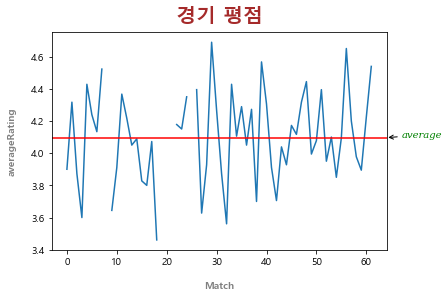

In [64]:
# 전체 경기 평점
title = '경기 평점'
fig, ax = plt.subplots()
ax.plot(교촌콤보반반_data['averageRating'])
ax.axhline(교촌콤보반반_data['averageRating'].mean(), color = 'red')
ax.set_xlabel('Match', fontdict=font_label, labelpad=15)
ax.set_ylabel('averageRating', fontdict=font_label, labelpad=15)
ax.set_title(title, fontdict=font_title, pad=10)
ax.annotate("average", (64, 교촌콤보반반_data['averageRating'].mean())
            , xytext=(67, 교촌콤보반반_data['averageRating'].mean()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
           arrowprops=arrowprops)

plt.show()

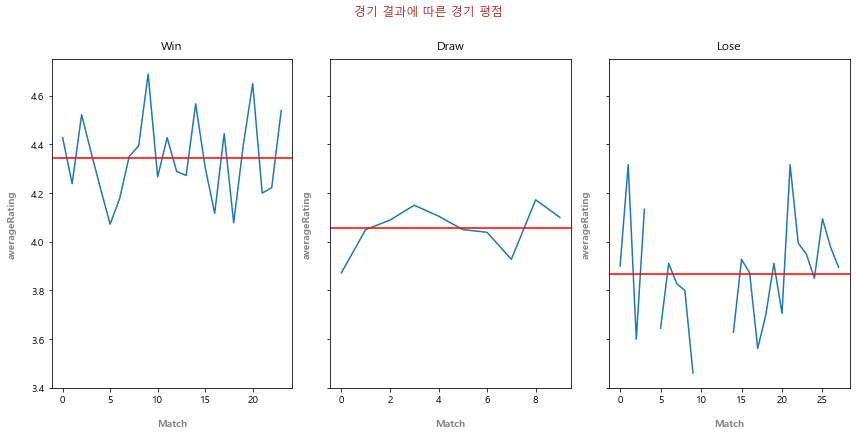

In [65]:
suptitle = '경기 결과에 따른 경기 평점'
title_list = ['Win', 'Draw', 'Lose']
data_list = [교촌콤보반반_win, 교촌콤보반반_draw, 교촌콤보반반_lose]

fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].plot(data['averageRating'])
    ax[idx].axhline(data['averageRating'].mean(), color = 'red')
    ax[idx].set_xlabel('Match', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('averageRating', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].annotate("average", (len(data)+3, data['averageRating'].mean())
                , xytext=(len(data)+5, data['averageRating'].mean()), 
               color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
               arrowprops=arrowprops)

plt.suptitle(suptitle, fontdict=font_title)
fig.tight_layout()

### - 승리했을 때, 모든 평점 4이상, 최대 평점은 4.8에 가까움
### - 비겼을 때, 대부분 평점 4.0 ~ 4.2 사이, 특정 2경기에서 4 미만의 낮은 값 -> 이유?
### - 패했을 때, 대부분 평점 승리하거나 비긴 경우보다 낮지만 높은 경우도 꽤 있음
### - 평점은 어떤 변수의 영향을 많이 받을까?
### ->상관분석을 통해 알아보겠음

In [66]:
columns_list = 교촌콤보반반.columns.to_list()
print('ShootDTO 시작 column : ', columns_list.index('shootTotal'))
print('ShootDTO 끝 column : ', columns_list.index('goalPenaltyKick'))
shoot_columns = columns_list[18:34]
shoot_columns

ShootDTO 시작 column :  18
ShootDTO 끝 column :  33


['shootTotal',
 'effectiveShootTotal',
 'shootOutScore',
 'goalTotal',
 'goalTotalDisplay',
 'ownGoal',
 'shootHeading',
 'goalHeading',
 'shootFreekick',
 'goalFreekick',
 'shootInPenalty',
 'goalInPenalty',
 'shootOutPenalty',
 'goalOutPenalty',
 'shootPenaltyKick',
 'goalPenaltyKick']

Text(0.5, 1.0, '슛 정보 상관관계')

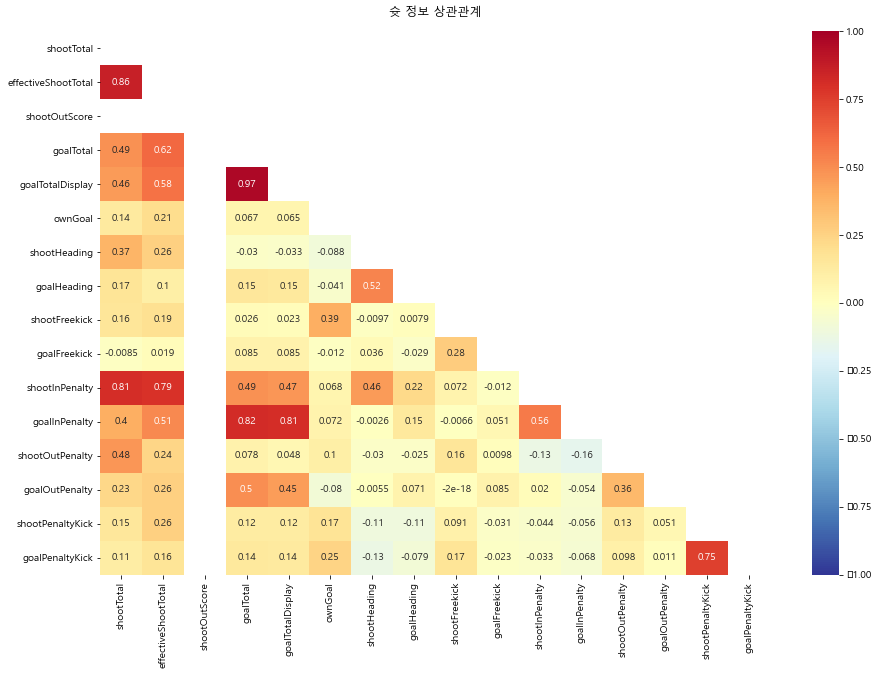

In [67]:
# 중복 제거 히트맵 시각화

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환
np.triu(np.ones_like(교촌콤보반반[shoot_columns].corr()))

# true/false mask 배열로 변환
mask = np.triu(np.ones_like(교촌콤보반반[shoot_columns].corr(), dtype=np.bool))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(교촌콤보반반[shoot_columns].corr(),
           mask=mask,
           vmin=-1,
           vmax=1,
           annot=True,
           cmap="RdYlBu_r",
           cbar=True)
ax.set_title("슛 정보 상관관계", pad = 15)

#### 상관성 매우 높음 (90% 이상) : (goalTotalDisplay, goalTotal)
#### 상관성 높은편 (70% 이상) : (effectiveShootTotal,shootTotal) , (shootPenalty,shootTotal) , (shootPenalty,effectiveShootTotal), (goalinPenalty,goalTotal) , (goalinPenalty,goalTotalDisplay), (goalPenaltyKick,shootPenaltyKick)

In [68]:
not_교촌콤보반반 = 교촌콤보반반.loc[교촌콤보반반['nickname']!='교촌콤보반반'] # 상대방 데이터
not_교촌콤보반반.head(3)

,matchId,matchDate,ouid,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,...,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,65846397843991ed5a64c945,2023-12-21T16:21:41,29873d80440e329c50437973ee1e3f97,농담곰임,202401,승,0,0.0,3.0,0.0,...,5.0,5.0,20.0,17.0,3.0,3.0,10.0,3.0,7.0,4.0
3,65846033666df12ae3510154,2023-12-21T16:08:01,7e015f89bd7bc879c39a658350ddd3c4,청천동굴리트,202401,승,0,0.0,2.0,1.0,...,0.0,0.0,35.0,29.0,1.0,1.0,5.0,0.0,8.0,5.0
4,6584560338f538404be9f7cd,2023-12-21T15:25:07,e47b2deb73852c222ac001da857a7136,김리암,202401,무,0,0.0,0.0,0.0,...,1.0,0.0,21.0,19.0,4.0,1.0,4.0,0.0,7.0,5.0


In [69]:
# 골 성공률 변수 생성
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이전 데이터 형태 : ', not_교촌콤보반반.shape)
print('-'*50)

shoot_kind = ['Heading', 'Freekick', 'InPenalty', 'OutPenalty', 'PenaltyKick']

for kind in shoot_kind:
    교촌콤보반반[f'goal{kind}_rate'] = round(교촌콤보반반[f'goal{kind}'] / 교촌콤보반반[f'shoot{kind}'], 2)
    교촌콤보반반_data[f'goal{kind}_rate'] = round(교촌콤보반반_data[f'goal{kind}'] / 교촌콤보반반_data[f'shoot{kind}'], 2)
    not_교촌콤보반반[f'goal{kind}_rate'] = round(not_교촌콤보반반[f'goal{kind}'] / not_교촌콤보반반[f'shoot{kind}'], 2)
    
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이후 데이터 형태 : ', not_교촌콤보반반.shape)

변수 생성 이전 데이터 형태 :  (124, 52)
변수 생성 이전 데이터 형태 :  (62, 61)
변수 생성 이전 데이터 형태 :  (62, 52)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (124, 57)
변수 생성 이후 데이터 형태 :  (62, 66)
변수 생성 이후 데이터 형태 :  (62, 57)


In [70]:
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이전 데이터 형태 : ', not_교촌콤보반반.shape)
print('-'*50)
교촌콤보반반['goal_own_rate'] = round(교촌콤보반반['ownGoal'] / 교촌콤보반반['goalTotal'])
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이후 데이터 형태 : ', not_교촌콤보반반.shape)

변수 생성 이전 데이터 형태 :  (124, 57)
변수 생성 이전 데이터 형태 :  (62, 66)
변수 생성 이전 데이터 형태 :  (62, 57)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (124, 58)
변수 생성 이후 데이터 형태 :  (62, 66)
변수 생성 이후 데이터 형태 :  (62, 57)


In [71]:
# 전체 골 중 해당 슛 비율
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이전 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이전 데이터 형태 : ', not_교촌콤보반반.shape)
print('-'*50)

for kind in shoot_kind:
    교촌콤보반반[f'total_goal{kind}_rate'] = round(교촌콤보반반[f'goal{kind}'] / 교촌콤보반반[f'goalTotal'], 2)
    교촌콤보반반_data[f'total_goal{kind}_rate'] = round(교촌콤보반반_data[f'goal{kind}'] / 교촌콤보반반_data[f'goalTotal'], 2)
    not_교촌콤보반반[f'total_goal{kind}_rate'] = round(not_교촌콤보반반[f'goal{kind}'] / not_교촌콤보반반[f'goalTotal'], 2)
    
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반.shape)
print('변수 생성 이후 데이터 형태 : ', 교촌콤보반반_data.shape)
print('변수 생성 이후 데이터 형태 : ', not_교촌콤보반반.shape)

변수 생성 이전 데이터 형태 :  (124, 58)
변수 생성 이전 데이터 형태 :  (62, 66)
변수 생성 이전 데이터 형태 :  (62, 57)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (124, 63)
변수 생성 이후 데이터 형태 :  (62, 71)
변수 생성 이후 데이터 형태 :  (62, 62)


In [72]:
# 전체 124개 데이터
교촌콤보반반[교촌콤보반반.columns[교촌콤보반반.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,goal_own_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,49.000000,9.000000,114.000000,96.000000,12.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.135918,0.111111,0.356140,0.230938,0.583333,0.0,0.060288,0.003173,0.758173,0.213846,0.027981
std,0.295366,0.333333,0.270206,0.324806,0.514929,0.0,0.206921,0.032359,0.330944,0.314715,0.107887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
50%,0.000000,0.000000,0.330000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.500000,0.500000,1.000000,0.0,0.000000,0.000000,1.000000,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.330000,1.000000,1.000000,0.500000


In [73]:
# 교촌콤보반반의 62개 데이터
교촌콤보반반_data[교촌콤보반반_data.columns[교촌콤보반반_data.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,21.000000,4.00,56.000000,50.000000,7.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.158571,0.25,0.403929,0.172400,0.428571,0.029800,0.006600,0.805200,0.169800,0.025000
std,0.359225,0.50,0.287368,0.292878,0.534522,0.104227,0.046669,0.311083,0.286075,0.104124
min,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000
50%,0.000000,0.00,0.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.25,0.525000,0.310000,1.000000,0.000000,0.000000,1.000000,0.330000,0.000000
max,1.000000,1.00,1.000000,1.000000,1.000000,0.500000,0.330000,1.000000,1.000000,0.500000


In [74]:
# 상대방 62개 데이터
not_교촌콤보반반[not_교촌콤보반반.columns[not_교촌콤보반반.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,28.000000,5.0,58.00000,46.000000,5.000000,54.000000,54.0,54.000000,54.000000,54.000000
mean,0.118929,0.0,0.31000,0.294565,0.800000,0.088519,0.0,0.714630,0.254630,0.030741
std,0.242508,0.0,0.24627,0.348385,0.447214,0.267352,0.0,0.345487,0.336596,0.112163
min,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.17750,0.000000,1.000000,0.000000,0.0,0.500000,0.000000,0.000000
50%,0.000000,0.0,0.25000,0.100000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
75%,0.062500,0.0,0.40000,0.500000,1.000000,0.000000,0.0,1.000000,0.500000,0.000000
max,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.500000


### 각 골 비율에 결측값들이 다수 존재하지만, 각 변수에 따라 결측값 처리 방법을 다르게 한다.
### goalHeading_rate 와 같이 해당 슛의 성공 비율을 보는 변수들은 0으로 결측값 처리를 할 필요가 없을 듯 하다.
### 성공비율을 보는 것이기 때문에 시도하지 않은 값들에 임의로 결측값들을 모두 채워버리면, 성공 비율을 이해하는데 혼잡을 야기할 수 있기 때문이다.
### 대신, total_goalHeading_rate와 같은 값들은 전체 슈팅 중 해당 골의 비율을 보는 것이기 때문에, goalTotal 값이 0이면 나머지 비율도 0으로 얘기할 수 있다.

In [75]:
print(교촌콤보반반.isna().sum())
print(교촌콤보반반_data.isna().sum())
print(not_교촌콤보반반.isna().sum())

matchId                        0
matchDate                      0
ouid                           0
nickname                       0
seasonId                       0
                              ..
total_goalHeading_rate        20
total_goalFreekick_rate       20
total_goalInPenalty_rate      20
total_goalOutPenalty_rate     20
total_goalPenaltyKick_rate    20
Length: 63, dtype: int64
matchId                        0
matchDate                      0
ouid                           0
nickname                       0
seasonId                       0
                              ..
total_goalHeading_rate        12
total_goalFreekick_rate       12
total_goalInPenalty_rate      12
total_goalOutPenalty_rate     12
total_goalPenaltyKick_rate    12
Length: 71, dtype: int64
matchId                       0
matchDate                     0
ouid                          0
nickname                      0
seasonId                      0
                             ..
total_goalHeading_rate        8


In [76]:
# 결측값 채우기
na_columns = list(교촌콤보반반.columns[교촌콤보반반.columns.str.contains('total_goal')])
na_columns

['total_goalHeading_rate',
 'total_goalFreekick_rate',
 'total_goalInPenalty_rate',
 'total_goalOutPenalty_rate',
 'total_goalPenaltyKick_rate']

In [77]:
print('결측값 채우기 이전 데이터 : \n', 교촌콤보반반.isna().sum())
print('결측값 채우기 이전 데이터 : \n', 교촌콤보반반_data.isna().sum())
print('결측값 채우기 이전 데이터 : \n', not_교촌콤보반반.isna().sum())

for col in na_columns:
    교촌콤보반반[col] = 교촌콤보반반[col].fillna(0)
    교촌콤보반반_data[col] = 교촌콤보반반_data[col].fillna(0)
    not_교촌콤보반반[col] = not_교촌콤보반반[col].fillna(0)
print('-'*50)
print('결측값 채우기 이후 데이터 : \n', 교촌콤보반반.isna().sum())
print('결측값 채우기 이후 데이터 : \n', 교촌콤보반반_data.isna().sum())
print('결측값 채우기 이후 데이터 : \n', not_교촌콤보반반.isna().sum())

결측값 채우기 이전 데이터 : 
 matchId                        0
matchDate                      0
ouid                           0
nickname                       0
seasonId                       0
                              ..
total_goalHeading_rate        20
total_goalFreekick_rate       20
total_goalInPenalty_rate      20
total_goalOutPenalty_rate     20
total_goalPenaltyKick_rate    20
Length: 63, dtype: int64
결측값 채우기 이전 데이터 : 
 matchId                        0
matchDate                      0
ouid                           0
nickname                       0
seasonId                       0
                              ..
total_goalHeading_rate        12
total_goalFreekick_rate       12
total_goalInPenalty_rate      12
total_goalOutPenalty_rate     12
total_goalPenaltyKick_rate    12
Length: 71, dtype: int64
결측값 채우기 이전 데이터 : 
 matchId                       0
matchDate                     0
ouid                          0
nickname                      0
seasonId                      0
       

## 슛 종류에 따른 골 비율

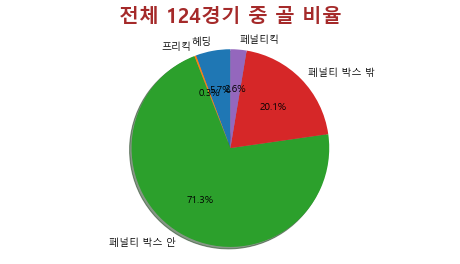

In [78]:
# 전체 124경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = 교촌콤보반반[교촌콤보반반.columns[교촌콤보반반.columns.str.contains('total_goal')]].mean().tolist()
explode = (0,0,0,0,0)

title = '전체 124경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.show()

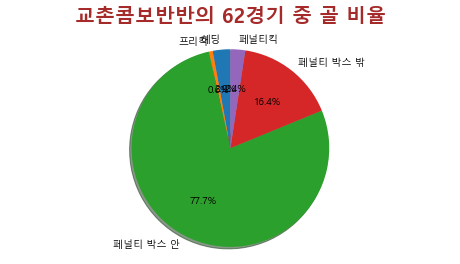

In [79]:
# 교촌콤보반반의 62경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = 교촌콤보반반_data[교촌콤보반반_data.columns[교촌콤보반반_data.columns.str.contains('total_goal')]].mean().tolist()
explode = (0,0,0,0,0)

title = '교촌콤보반반의 62경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.show()

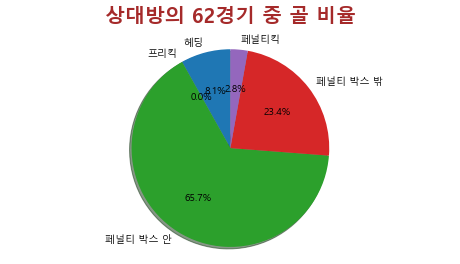

In [80]:
# 상대방 62경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = not_교촌콤보반반[not_교촌콤보반반.columns[not_교촌콤보반반.columns.str.contains('total_goal')]].mean().tolist()
explode = (0,0,0,0,0)

title = '상대방의 62경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.show()

#### 교촌콤보반반의 데이터를 본다면,
#### 페널티 박스 안 > 페널티 박스 밖 > 헤딩 > 페널티킥 > 프리킥 순서대로 골 비율이 높았고
#### 상대방 데이터를 본다면,
#### 페널티 박스 안 > 페널티 박스 밖 > 헤딩 > 페널티킥 > 프리킥(0%) 순서대로 골 비율이 높았다.
#### -> 교촌콤보반반은 프리킥으로 한번도 먹힌 적이 없다

## 슛 성공률

In [81]:
total_goal_rate_list = 교촌콤보반반.columns[교촌콤보반반.columns.str.contains('total_goal')] # 전체 골 중 해당 골 비율
goal_rate_list = 교촌콤보반반.columns[교촌콤보반반.columns.str.contains('rate')][:6] # 해당 슛 성공률

data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : 교촌콤보반반[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.135918
1,goalFreekick_rate,0.111111
2,goalInPenalty_rate,0.356140
3,goalOutPenalty_rate,0.230938
4,goalPenaltyKick_rate,0.583333


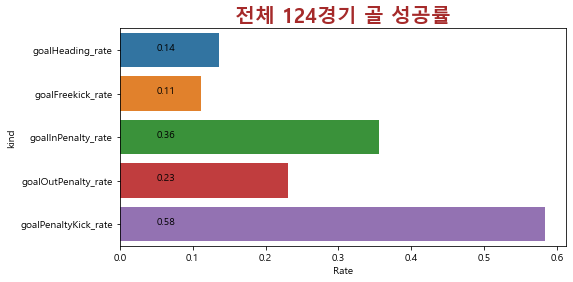

In [82]:
title = '전체 124경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.show()

In [83]:
data2 = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : 교촌콤보반반_data[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data2

,shoot_kind,value
0,goalHeading_rate,0.158571
1,goalFreekick_rate,0.250000
2,goalInPenalty_rate,0.403929
3,goalOutPenalty_rate,0.172400
4,goalPenaltyKick_rate,0.428571


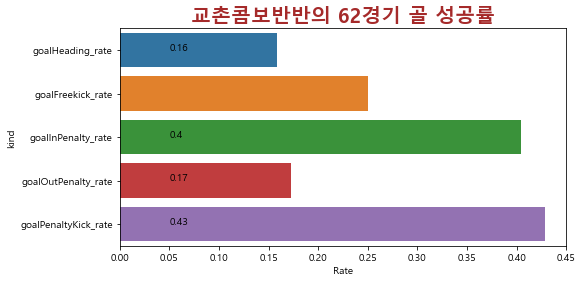

In [84]:
title = '교촌콤보반반의 62경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data2)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data2['value']):
    if idx == 1:
        continue
    ax.text(0.05, idx, round(value, 2))
    
plt.show()

In [85]:
data3 = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : not_교촌콤보반반[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data3

,shoot_kind,value
0,goalHeading_rate,0.118929
1,goalFreekick_rate,0.000000
2,goalInPenalty_rate,0.310000
3,goalOutPenalty_rate,0.294565
4,goalPenaltyKick_rate,0.800000


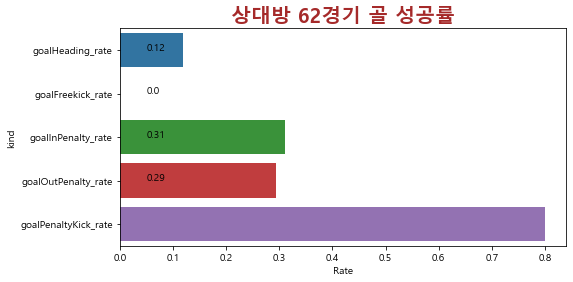

In [86]:
title = '상대방 62경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data3)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data3['value']):
    if idx == 4:
        continue
    ax.text(0.05, idx, round(value, 2))
    
plt.show()

####  교촌콤보반반의 데이터를 본다면, 페널티 킥 (43%) > 페널티 안 (40%) > 프리킥 (25%) >  페널티 밖 (17%) > 헤딩 (16%) 순서대로 골 성공률이 높음.
#### 상대방 데이터를 본다면, 페널티 킥 (80%) > 페널티 안 (31%) > 페널티 밖 (29%) > 헤딩 (12%) > 프리킥 (0%) 순서대로 골 성공률이 높음.
#### 페널티 킥과 프리킥은 총 몇번 발생했길래 각각의 확률이 나왔는지 볼 필요가 존재한다.

#### 페널티킥이나 페널티 안에서 골이 많이 발생하는 듯하다. ->두 플레이어 스타일 파악가능?

#### 그렇다면, 페널티킥에 필요한 파울과 페널티 안에서 발생하는 골의 요인들은 무엇이 존재할까?

#### 상관관계와 회귀분석을 통해 알아볼 수 있을 듯 함.

In [87]:
not_교촌콤보반반['shootFreekick'].describe()


count    62.000000
mean      0.080645
std       0.274512
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: shootFreekick, dtype: float64

## 히스토그램

In [88]:
shoot_array = np.array(shoot_columns).reshape(4,-1)
shoot_array

array([['shootTotal', 'effectiveShootTotal', 'shootOutScore',
        'goalTotal'],
       ['goalTotalDisplay', 'ownGoal', 'shootHeading', 'goalHeading'],
       ['shootFreekick', 'goalFreekick', 'shootInPenalty',
        'goalInPenalty'],
       ['shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick',
        'goalPenaltyKick']], dtype='<U19')

In [89]:
for j,col in enumerate(shoot_array):
    print(j, col)

0 ['shootTotal' 'effectiveShootTotal' 'shootOutScore' 'goalTotal']
1 ['goalTotalDisplay' 'ownGoal' 'shootHeading' 'goalHeading']
2 ['shootFreekick' 'goalFreekick' 'shootInPenalty' 'goalInPenalty']
3 ['shootOutPenalty' 'goalOutPenalty' 'shootPenaltyKick' 'goalPenaltyKick']


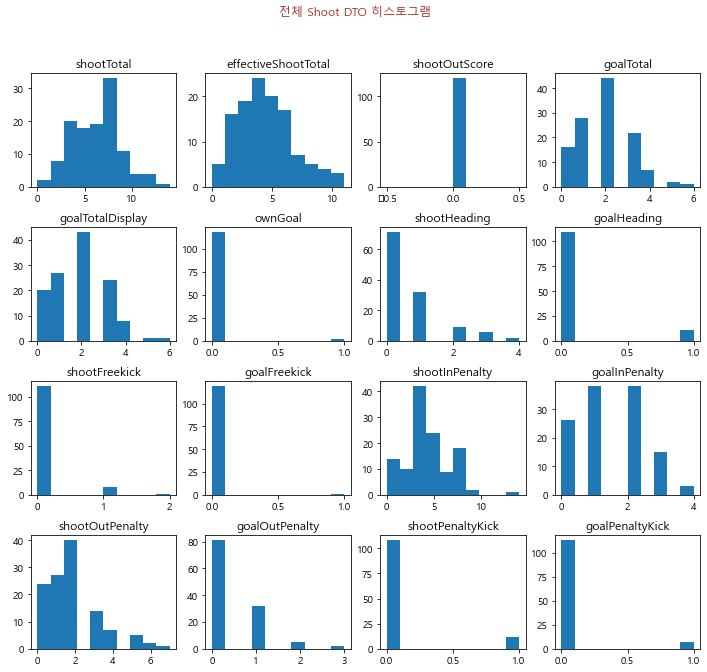

In [90]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(교촌콤보반반[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle('전체 Shoot DTO 히스토그램', fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

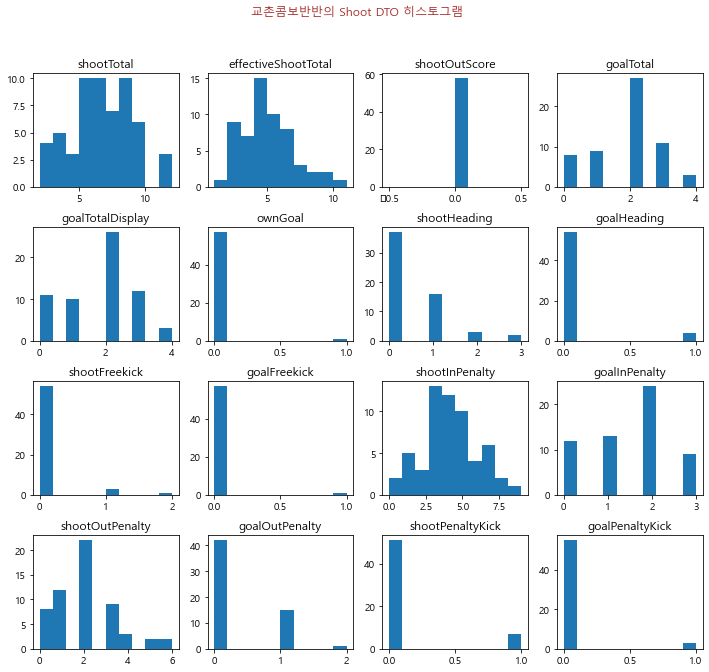

In [91]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(교촌콤보반반_data[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle('교촌콤보반반의 Shoot DTO 히스토그램', fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

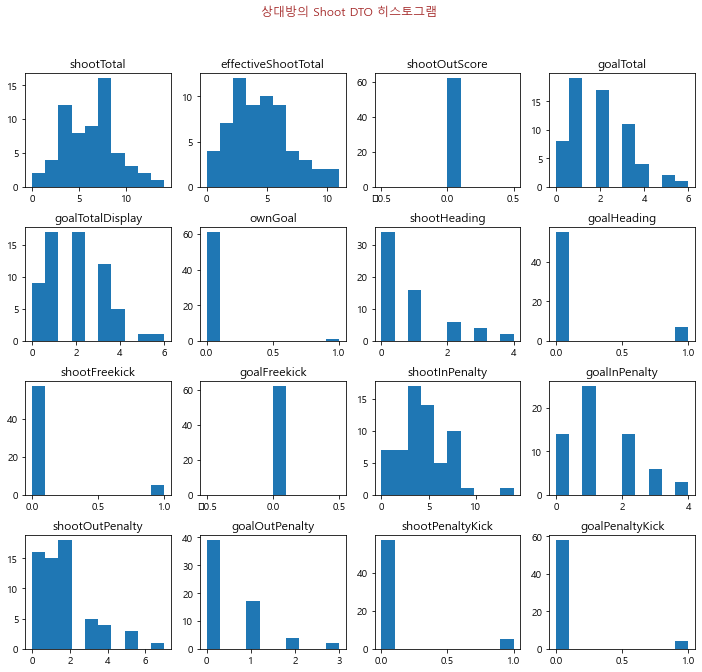

In [92]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(not_교촌콤보반반[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle('상대방의 Shoot DTO 히스토그램', fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

## 박스플롯

### 경기결과 비교

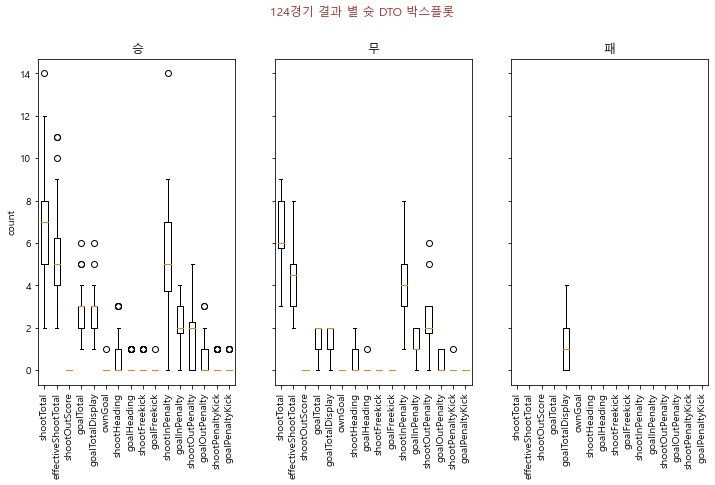

In [93]:
# 124개 데이터
# 경기 결과에 따른 박스플롯 확인
win = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='승']
draw = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='무']
lose = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '124경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.show()

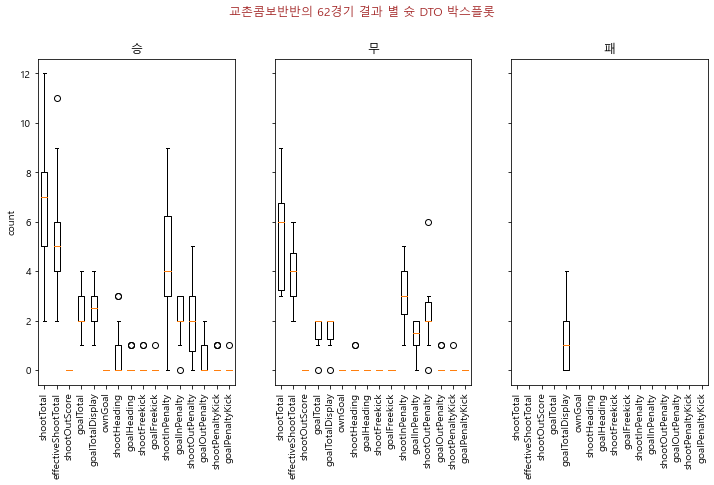

In [94]:
# 62개 데이터 - 교촌콤보반반_data
# 경기 결과에 따른 박스플롯 확인
win = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='승']
draw = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='무']
lose = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '교촌콤보반반의 62경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.show()

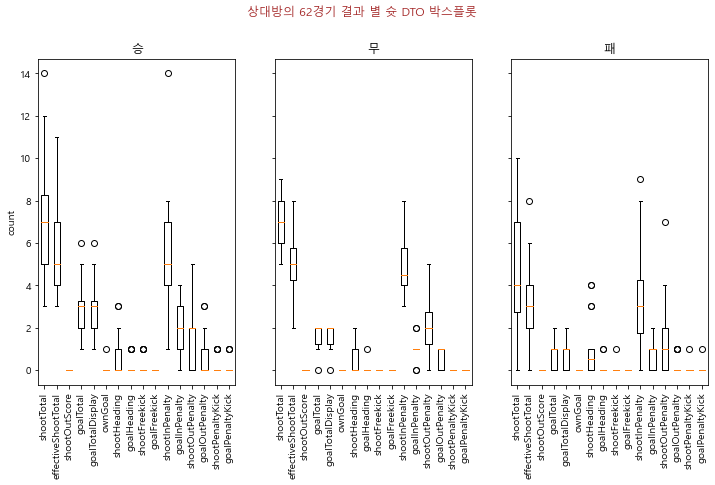

In [95]:
# 62개 데이터 - 상대방
# 경기 결과에 따른 박스플롯 확인
win = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='승']
draw = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='무']
lose = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '상대방의 62경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.show()

## ANOVA-test(전체 데이터)

In [138]:
# 통계 검정 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs as sp
import pingouin as pg
from statsmodels.stats.multicomp import MultiComparison

### 정규성 검정 정의

In [164]:
# 정규화 검정 클래스 구현
# shapiro_test를 먼저 진행한 후, 정규성 만족하는 경우가 하나도 없다면, 왜도 & 첨도를 활용하여 구한다.

class normalization_test:
    def __init__(self, data, cols):
        self.data = data
        self.cols = cols
    
    # shapiro-wilk test 정규성 검정
    def shapiro_test(self):
        
        alpha = 0.05

        norm_cols = []
        notnorm_cols = []

        for col in self.cols:
            stat, p = stats.shapiro(self.data[col].dropna().values)
            if p > alpha:
                norm_cols.append(col)
            else:
                notnorm_cols.append(col)
        return norm_cols, notnorm_cols
    
    # 왜도, 첨도를 활용한 정규성 검정
    # 왜도 < 2 & 첨도 < 2인 경우 정규성 만족한다 가정
    def not_shapiro_test(self):
        norm_cols = []
        notnorm_cols = []

        for col in self.cols:
            skew = self.data[col].skew()
            kurtosis = self.data[col].kurtosis()

            if skew <= 2 and kurtosis <= 2:
                norm_cols.append(col)
            else:
                notnorm_cols.append(col)     

        return norm_cols, notnorm_cols

In [165]:
# shapiro-test 할 것인지, 왜도&첨도로 구분할 것인지

class devide_test(normalization_test):    
    def test(self):        
        norm, notnorm = self.shapiro_test()
        
        if len(norm) == 0:
            norm, notnorm = self.not_shapiro_test()
            
        return norm, notnorm

### 등분산 검정 정의

In [166]:
# 정규성을 만족하는 변수들의 등분산성 검정을 실행
# levene 등분산 검정을 활용
def levene_test(data_list, norm_cols):
    same_var = []
    notsame_var = []

    for col in norm_cols:
        test_statistic, p_value = stats.levene(*[data[col] for data in data_list])
        
        if p_value >= 0.05:
            same_var.append(col)
        else:
            notsame_var.append(col)

    return same_var, notsame_var

## 분산 분석 
### -정규성 만족하는 변수들에 한하여, 등분산성인지, 이분산성인지에 따라 검정법을 다르게 한다.
### -정규성과 등분산성 모두 만족하는 경우 : ANOVA-Test를 진행한다.
### -정규성은 만족하지만 등분산성 만족하지 않는 경우 : Welch-ANOVA-Test를 진행한다.
### -각 분산분석의 귀무가설과 대립가설
### -H0 : 독립변수 집단 간의 차이가 존재하지 않는다.
### -H1 : 독립변수 집단 간의 차이가 존재한다.

In [167]:
def analysis_var(data, col_x, data_list, norm_cols):
    mean_anova = [] # 그룹 간에 차이가 있는 변수
    notmean_anova = [] # 그룹 간에 차이가 없는 변수

    same_var, notsame_var = levene_test(data_list, norm_cols)
    
    for col1 in same_var: # 정규성과 동분산성이 만족되는 경우 ANOVA-Test 수행
        model = ols(f'{col1} ~ C({col_x})', data).fit()
        anova = anova_lm(model)
        anova_p = anova.iloc[0, 4]

        if anova_p <= 0.05:
            mean_anova.append(col1)
        else:
            notmean_anova.append(col1)

    for col2 in notsame_var: # 정규성은 만족하나 동분산성이 만족되지 않는 경우 Welch-ANOVA-Test 수행
        welch_anova = pg.welch_anova(dv=col2, between=col_x, data=data)
        welch_p = welch_anova['p-unc'].values[0]

        if welch_p <= 0.05:
            mean_anova.append(col2)
        else:
            notmean_anova.append(col2)

    return mean_anova, notmean_anova

## 사후 검정
### -(정규성 & 등분산성), (정규성 & 이분산성)인 경우, 분산분석에서 유의미한 변수들을 구했을 때, 진행하는 사후 분석 방법

In [188]:
def posthoc_test(data, col_y, col_x):
    for col in col_y:
        mc = MultiComparison(data[col], data[col_x])
        result = mc.tukeyhsd()
        print(col)
        print(result)
        print('-'*50)

## 비모수 검정 

### - 정규성을 만족하지 않을 때, 비모수적 검정법의 Kruskal-Wallis Rank Sum Test를 활용하여 분산분석을 실행한다.
### - H0 : 집단 간의 차이가 존재하지 않는다.
### - H1 : 집단 간의 차이가 존재한다.

In [169]:
def nonparam_test(data_list, cols):
    meaning_cols = []
    notmeaning_cols = []

    for col in cols:
        val, p = stats.kruskal(data_list[0][col], data_list[1][col], data_list[2][col])
        if p <= 0.05:
            meaning_cols.append(col)
        else:
            notmeaning_cols.append(col)

    return meaning_cols, notmeaning_cols

## 사후검정 (비모수 검정 ver)
### -비모수 분산분석이 유의한 결과를 나타냈을 때, 사후분석을 진행한다.
### -귀무가설 : 각 집단 간 유의미한 차이가 존재한지 않는다.
### -대립가설 : 각 집단 간 유의미한 차이가 존재한다.

In [170]:
def nonparam_posthoc(data, col_y, col_x):
    for col in col_y:
        posthoc = sp.posthoc_conover(data, col, col_x, p_adjust="holm")
        print(col)
        print(posthoc)

### 정규성 검정 결과

In [171]:
shoot_norm_test_list = devide_test(교촌콤보반반, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print("정규성 만족 변수 : ", shoot_norm_list)
print("정규성 불만족 변수 : ", shoot_notnorm_list)

정규성 만족 변수 :  ['shootOutScore']
정규성 불만족 변수 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick', 'goalFreekick', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 등분산 검정 결과

In [172]:
win = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='승']
draw = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='무']
lose = 교촌콤보반반.loc[교촌콤보반반['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  []
이분산 변수들 :  ['shootOutScore']


### 분산분석 결과

In [173]:
shoot_mean_list, shoot_notmean_list = analysis_var(교촌콤보반반, 'matchResult', [win,draw,lose], shoot_norm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['shootOutScore']


### 비모수 검정 결과

In [174]:
shoot_nonparam_meaning_list, shoot_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], shoot_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', shoot_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', shoot_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['goalTotalDisplay']
무의미한 비모수적 검정 변수들 : ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick', 'goalFreekick', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 사후분석 결과

In [175]:
nonparam_posthoc(교촌콤보반반, shoot_nonparam_meaning_list, 'matchResult')

goalTotalDisplay
          무             승             패
무  1.000000  2.489071e-06  5.686634e-03
승  0.000002  1.000000e+00  1.480457e-18
패  0.005687  1.480457e-18  1.000000e+00


#### - goalTotalDisplay : 승&무, 승&패

## ANOVA-Test (교촌콤보반반의 데이터)

### 정규성 검정 결과

In [194]:
shoot_norm_test_list = devide_test(교촌콤보반반_data, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print('정규성 만족 변수들 : ', shoot_norm_list)
print('정규성 불만족 변수들 : ', shoot_notnorm_list)

정규성 만족 변수들 :  ['shootTotal', 'shootOutScore', 'shootInPenalty']
정규성 불만족 변수들 :  ['effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick', 'goalFreekick', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 등분산 검정 결과

In [195]:
win = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='승']
draw = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='무']
lose = 교촌콤보반반_data.loc[교촌콤보반반_data['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  []
이분산 변수들 :  ['shootTotal', 'shootOutScore', 'shootInPenalty']


### 분산분석 결과

In [196]:
shoot_mean_list, shoot_notmean_list = analysis_var(교촌콤보반반_data, 'matchResult', [win,draw,lose], shoot_norm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['shootTotal', 'shootOutScore', 'shootInPenalty']


### 비모수검정 결과

In [197]:
nonparam_meaning_list, nonparam_notmeaning_list =  nonparam_test([win, draw, lose], shoot_notnorm_list)
print('유의미한 비모수 검정 변수들 :', nonparam_meaning_list)
print('무의미한 비모수 검정 변수들 :', nonparam_notmeaning_list)

유의미한 비모수 검정 변수들 : ['goalTotalDisplay']
무의미한 비모수 검정 변수들 : ['effectiveShootTotal', 'goalTotal', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick', 'goalFreekick', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 사후분석 결과

In [198]:
nonparam_posthoc(교촌콤보반반_data, nonparam_meaning_list, 'matchResult')

goalTotalDisplay
         무         승         패
무  1.00000  0.008530  0.260030
승  0.00853  1.000000  0.000002
패  0.26003  0.000002  1.000000


#### - goalTotalDisplay : 승&무, 승&패

## 유의미한 변수의 박스플롯 시각화

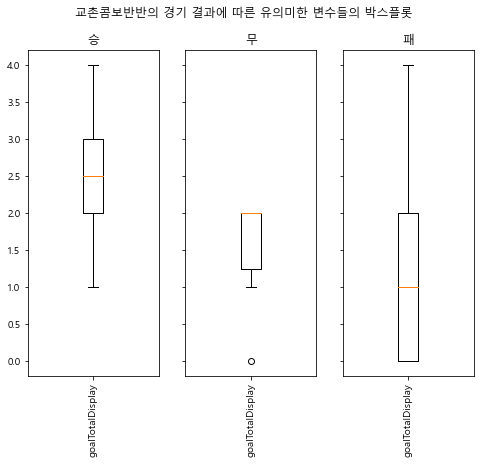

In [199]:
suptitle = '교촌콤보반반의 경기 결과에 따른 유의미한 변수들의 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle)
plt.show()

## ANOVA-Test (상대방 데이터)
### 정규성 검정 결과

In [200]:
shoot_norm_test_list = devide_test(not_교촌콤보반반, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print('정규성 만족 변수들 : ', shoot_norm_list)
print('정규성 불만족 변수들 : ', shoot_notnorm_list)

정규성 만족 변수들 :  ['shootTotal', 'effectiveShootTotal', 'shootOutScore', 'goalFreekick']
정규성 불만족 변수들 :  ['goalTotal', 'goalTotalDisplay', 'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 등분산검정 결과

In [201]:
win = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='승']
draw = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='무']
lose = not_교촌콤보반반.loc[not_교촌콤보반반['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  ['shootTotal', 'effectiveShootTotal']
이분산 변수들 :  ['shootOutScore', 'goalFreekick']


### 분산분석 결과

In [202]:
shoot_mean_list, shoot_notmean_list = analysis_var(not_교촌콤보반반, 'matchResult', [win,draw,lose], shoot_norm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  ['shootTotal', 'effectiveShootTotal']
무의미한 분산 분석 변수들 :  ['shootOutScore', 'goalFreekick']


### 사후검정 결과

In [203]:
posthoc_test(not_교촌콤보반반, shoot_mean_list, 'matchResult')

shootTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     무      승   0.0429 0.9989 -2.2699  2.3556  False
     무      패  -2.3083 0.0569 -4.6713  0.0546  False
     승      패  -2.3512 0.0056 -4.0976 -0.6048   True
----------------------------------------------------
--------------------------------------------------
effectiveShootTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     무      승   0.7429 0.5982 -1.0973   2.583  False
     무      패  -1.7333 0.0766 -3.6134  0.1467  False
     승      패  -2.4762 0.0002 -3.8657 -1.0867   True
----------------------------------------------------
--------------------------------------------------


### 사후 분석 결과
#### 유의미한 차이가 있는 집단군을 살펴보자.

#### shootTotal : 승&패 (등분산)
#### effectiveShootTotal : 승&패 (등분산)

## 유의미한 변수들의 박스플롯 시각화

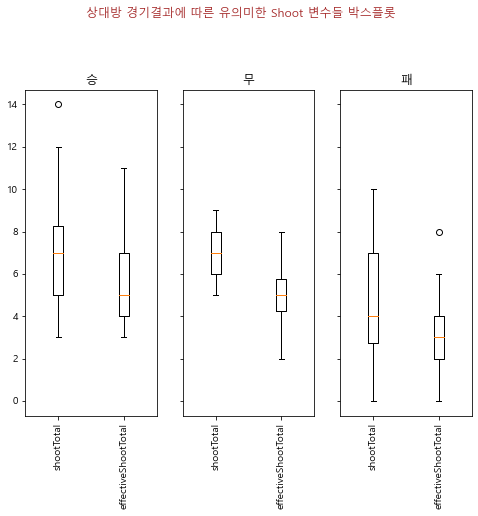

In [205]:
suptitle = '상대방 경기결과에 따른 유의미한 Shoot 변수들 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_mean_list].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_mean_list)+1)])
    ax[idx].set_xticklabels(shoot_mean_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle, fontdict=font_title, y=1.05)
plt.show()